# **CNN**

In [ ]:

!pip install konlpy -q


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import re
import urllib.request

from konlpy.tag import Okt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

import time
import datetime


import warnings
warnings.filterwarnings('ignore')


### **1) 데이터 가져오기**  

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path = "/content/gdrive/My Drive/Colab Notebooks/wtm/finalproj/"


Mounted at /content/gdrive/


In [ ]:
# 데이터 불러오기

hunjea_cases = pd.read_csv(file_path + "분야별_헌재판례.csv")

hunjea_cases.shape


(648, 4)

In [ ]:
print(hunjea_cases['Category'].unique())
print()

print("◎ 총 분야 매체 수: ", len(hunjea_cases['Category'].unique()))

['언론 등 정신적 자유에 관한 결정' '가족 · 노동 등 사회관계에 관한 결정' '절차적 기본권 및 형사관계에 관한 결정'
 '정치 · 선거관계에 관한 결정' '경제 · 재산권 · 조세관계에 관한 결정' '헌법위원회 및 대법원 헌법판례']

◎ 총 분야 매체 수:  6


In [ ]:
pd.DataFrame(hunjea_cases.groupby('Category').size().reset_index(name = 'count'))

,Category,count
0,가족 · 노동 등 사회관계에 관한 결정,139
1,경제 · 재산권 · 조세관계에 관한 결정,109
2,언론 등 정신적 자유에 관한 결정,119
3,절차적 기본권 및 형사관계에 관한 결정,158
4,정치 · 선거관계에 관한 결정,120
5,헌법위원회 및 대법원 헌법판례,3


In [ ]:
hunjea_cases = hunjea_cases[hunjea_cases.Category != '헌법위원회 및 대법원 헌법판례']
hunjea_cases

,CaseNum,Title,Category,Content
0,2020헌마542,주민등록법상 지문날인제도 관련 사건,언론 등 정신적 자유에 관한 결정,주민등록법상 지문날인제도 사건<헌재 2024. 4. 25. 2020헌마542 주...
1,2020헌가4,유류분에 관한 위헌제청 및 헌법소원 사건,가족 · 노동 등 사회관계에 관한 결정,민법상 유류분제도 사건 <헌재 2024. 4. 25. 2020헌가4 등 민...
2,2019헌마500,주 52시간 상한제 사건,가족 · 노동 등 사회관계에 관한 결정,주 52시간 상한제 사건 <헌재 2024. 2. 28. 2019헌마500 최저임금...
3,2022헌마356,태아의 성별 고지 제한 사건,가족 · 노동 등 사회관계에 관한 결정,태아의 성별고지 금지 위헌확인 사건 <헌재 2024. 2. 28. 2022헌마35...
4,2020헌마1476,동의 없는 가명정보 처리 사건,언론 등 정신적 자유에 관한 결정,동의 없는 가명정보 처리 사건 <헌재 2023. 10. 26. 2020헌마...
...,...,...,...,...
640,88헌가6,국회의원입후보자기탁금 사건,정치 · 선거관계에 관한 결정,가. 사건의 배경 이 사건은 후보자의 난립을 방지하고 깨끗한 선거를 이룩한...
641,88헌마22,임야조사서 열람신청 사건,언론 등 정신적 자유에 관한 결정,가. 사건의 배경 이 사건은 아직 국내에 정보공개법이 제정되지 않은 상태에...
642,89헌마38,명의신탁증여간주 사건,경제 · 재산권 · 조세관계에 관한 결정,가. 사건의 배경 이 사건은 등기를 요하는 재산에 대하여 실질소유자와 명의...
643,88헌가5등,보호감호 사건,절차적 기본권 및 형사관계에 관한 결정,가. 사건의 배경 이 사건은 제5공화국 당시 국가보위입법회의에서 제정되었던 ...


In [ ]:
#헌법재판소에서 지정해둔 Category에 맞게 Num 부여
ca_list = hunjea_cases['Category'].unique()
y = []

for i in range( len(hunjea_cases) ) :
  tmp = hunjea_cases['Category'][i]
  num = 0
  for j in ca_list :
    if j == tmp :
      y.append(num)
    else :
      num += 1

#dataFrame으로 변환
df_y = pd.DataFrame({"CaNum" : y})

In [ ]:
print(hunjea_cases['Category'].unique())
print()

print("◎ 총 분야 매체 수: ", len(hunjea_cases['Category'].unique()))

['언론 등 정신적 자유에 관한 결정' '가족 · 노동 등 사회관계에 관한 결정' '절차적 기본권 및 형사관계에 관한 결정'
 '정치 · 선거관계에 관한 결정' '경제 · 재산권 · 조세관계에 관한 결정']

◎ 총 분야 매체 수:  5


In [ ]:
df_y

,CaNum
0,0
1,1
2,1
3,1
4,0
...,...
640,3
641,0
642,4
643,2


In [ ]:

findf = hunjea_cases.drop('Category', axis=1)
findf = findf.drop('CaseNum', axis=1)
alldf = pd.concat([df_y, findf], axis=1)
alldf

,CaNum,Title,Content
0,0,주민등록법상 지문날인제도 관련 사건,주민등록법상 지문날인제도 사건<헌재 2024. 4. 25. 2020헌마542 주...
1,1,유류분에 관한 위헌제청 및 헌법소원 사건,민법상 유류분제도 사건 <헌재 2024. 4. 25. 2020헌가4 등 민...
2,1,주 52시간 상한제 사건,주 52시간 상한제 사건 <헌재 2024. 2. 28. 2019헌마500 최저임금...
3,1,태아의 성별 고지 제한 사건,태아의 성별고지 금지 위헌확인 사건 <헌재 2024. 2. 28. 2022헌마35...
4,0,동의 없는 가명정보 처리 사건,동의 없는 가명정보 처리 사건 <헌재 2023. 10. 26. 2020헌마...
...,...,...,...
640,3,국회의원입후보자기탁금 사건,가. 사건의 배경 이 사건은 후보자의 난립을 방지하고 깨끗한 선거를 이룩한...
641,0,임야조사서 열람신청 사건,가. 사건의 배경 이 사건은 아직 국내에 정보공개법이 제정되지 않은 상태에...
642,4,명의신탁증여간주 사건,가. 사건의 배경 이 사건은 등기를 요하는 재산에 대하여 실질소유자와 명의...
643,2,보호감호 사건,가. 사건의 배경 이 사건은 제5공화국 당시 국가보위입법회의에서 제정되었던 ...


## train / test set split

In [ ]:
train_data, test_data = train_test_split(alldf, test_size=0.2, random_state=1)

In [ ]:
train_data

,CaNum,Title,Content
537,4,부동산실권리자명의등기에관한법률 위헌제청 사건,가. 사건의 배경 민법에 의하면 부동산에 대한 권리는 등기하여야만 비로소 제...
349,1,조례제정의무 불이행에 대한 위헌확인 사건,조례제정의무 불이행에 대한 위헌확인 사건 <헌재 2009. 7. 30. 2006...
379,4,한국방송광고공사 지상파방송광고판매대행 독점 사건,한국방송광고공사 지상파방송광고판매대행 독점 사건 <헌재 2008. 11. 27....
500,1,한국전쟁중 양민학살사건에 대한 입법부작위 사건,가. 사건의 배경 청구인들은 경북 문경군 및 전남 함평군에서 한국전쟁기간...
90,0,‘금고의 정관으로 정하는 기간 중에’새마을금고 임원 선거 운동을 위한 호별방문 행위...,‘새마을금고의 정관으로 정하는 기간 중에’ 임원 선거 운동을 위한 호별방문 처벌 ...
...,...,...,...
129,2,항공기 탑승객에 대한 추가 보안검색 위헌확인 사건,항공기 탑승객에 대한 추가 보안검색 위헌확인 사건 <헌재 2018. 2. 22. ...
144,0,청탁금지법(일명 김영란법) 사건,청탁금지법 사건 <헌재 2016. 7. 28. 2015헌마236？412？662...
72,3,‘페이스북’선거운동 사건,교사 SNS 선거운동 사건 <헌재 2020. 2. 27. 2016헌마1071 기...
235,2,접촉차단시설에서의 변호사 접견 사건,접촉차단시설에서의 변호사 접견 사건 <헌재 2013. 8. 29. 2011헌마...


In [ ]:

print('◎ 훈련용 리뷰 개수 :',len(train_data))     # 훈련용 리뷰 개수 출력
print('◎ 테스트용 리뷰 개수 :',len(test_data))     # 테스트용 리뷰 개수 출력


◎ 훈련용 리뷰 개수 : 516
◎ 테스트용 리뷰 개수 : 129


### **2) 데이터 정제하기**

- 데이터 내용 중 중복 내용 및 Null 값 등이 있는지 확인 후 제거
- 특수분자 및 불용어 등을 제거

<Axes: xlabel='CaNum'>

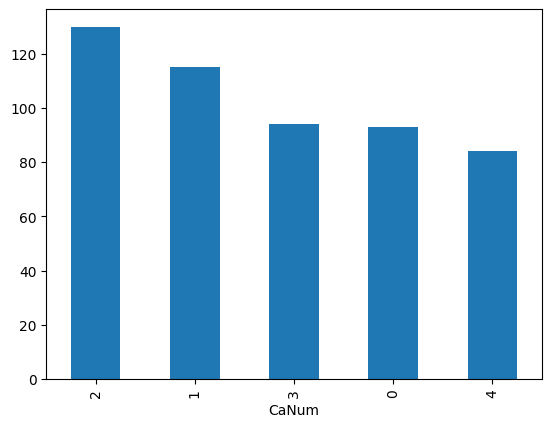

In [ ]:
# train data set에서 각 카테고리가 몇 개씩 존재하는지 확인


train_data['CaNum'].value_counts().plot(kind = 'bar')


In [ ]:
# 정확하게 몇 개인지 확인

print(train_data.groupby('CaNum').size().reset_index(name = 'count'))


   CaNum  count
0      0     93
1      1    115
2      2    130
3      3     94
4      4     84


In [ ]:
# Null 값을 가진 샘플이 있는지 Pandas의 isnull().values.any()로 확인

print(train_data.isnull().values.any())


False


In [ ]:
# train_data와 test_data에서 "...., ?"와 같은 각종 특수문자가 사용됨
# train_data로부터 한글만 남기고 제거하기 위해서 정규 표현식을 사용

train_data['Content'] = [re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " ", sent) for sent in train_data.Content]

train_data[:5]


,CaNum,Title,Content
537,4,부동산실권리자명의등기에관한법률 위헌제청 사건,가 사건의 배경 민법에 의하면 부동산에 대한 권리는 등기하여야만 비로소 제...
349,1,조례제정의무 불이행에 대한 위헌확인 사건,조례제정의무 불이행에 대한 위헌확인 사건 헌재 ...
379,4,한국방송광고공사 지상파방송광고판매대행 독점 사건,한국방송광고공사 지상파방송광고판매대행 독점 사건 헌재 ...
500,1,한국전쟁중 양민학살사건에 대한 입법부작위 사건,가 사건의 배경 청구인들은 경북 문경군 및 전남 함평군에서 한국전쟁기간...
90,0,‘금고의 정관으로 정하는 기간 중에’새마을금고 임원 선거 운동을 위한 호별방문 행위...,새마을금고의 정관으로 정하는 기간 중에 임원 선거 운동을 위한 호별방문 처벌 ...


In [ ]:
# train_data에 공백(white space)만 있거나 빈 값을 가진 행이 있다면 Null 값으로 변경
# 다시 한 번 Null 값이 존재하는지 확인

# white space 데이터를 empty value로 변경
train_data['Content'] = [re.sub("^ +", "", sent) for sent in train_data.Content]

train_data['Content'].replace("", np.nan, inplace=True)

print(train_data.isnull().sum())



CaNum      0
Title      0
Content    7
dtype: int64


In [ ]:


train_data.loc[train_data.Content.isnull()][:5]



,CaNum,Title,Content
526,3,국회의원지역선거구구역표 사건,NaN
531,3,1인1표제 사건,NaN
545,1,국적법 사건,NaN
559,1,제대군인가산점 사건,NaN
553,0,과외금지사건,NaN


In [ ]:
# NUll 샘플을 다시 제거

train_data = train_data.dropna(how = 'any')

print(len(train_data))



509


In [ ]:
# test 데이터에 지금까지 진행했던 전처리 과정들을 동일하게 진행

test_data.drop_duplicates(subset = ['Content'], inplace=True)           # Content 열에서 중복인 내용이 있다면 중복 제거


# test_data 의 Content 칼럼에 이상 문자들이 있어 string 으로 변환
# Convert the 'Content' column to a string object

test_data['Content'] = test_data['Content'].astype(str)


# Apply the regular expression to remove non-Korean characters and spaces

test_data['Content'] = [re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " ", sent) for sent in test_data.Content]  # 정규 표현식 수행

test_data['Content'] = [re.sub("^ +", "", sent) for sent in test_data.Content]    # 공백은 empty 값으로 변경

test_data['Content'].replace("", np.nan, inplace=True)                             # 공백은 Null 값으로 변경

test_data = test_data.dropna(how='any')                        # Null 값 제거

print('◎ 전처리 후 테스트용 샘플의 개수 :',len(test_data))


◎ 전처리 후 테스트용 샘플의 개수 : 126


### **3) 토큰화**

In [ ]:
# 불용어를 정의

stopwords = ['규정', '조항', '대한' ,'소원' ,'목적', '요지', '헌법소원심판', '필요', '사건', '위헌', '합헌', '법률', '제청', '청구인', '변호인', '제청', '재판', '피고인', '변호사', '심판', '청구' ,'재판관', '이유' ,'위헌확인', '피청구인', '수사' ,'이유', '원칙', '여부', '확인', '우리', '법률조항', '반대의견', '확인', '하나', '무엇', '제한', '인정', '대상', '입법', '헌법재판소', '재판소']

okt = Okt()


In [ ]:
# train_data에 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 X_train에 저장

X_train = []

start = time.time()    # 시작 시간 기록 ==============================


for sentence in train_data['Content']:
    temp_X = okt.nouns(sentence)     # 토큰화
    temp_X = [word for word in temp_X if (len(word) > 1) and (not word in stopwords)] # 불용어 제거
    X_train.append(temp_X)


processing_time = time.time() - start    # 경과 시간 계산  ==============================
times = str(datetime.timedelta(seconds = processing_time))
print()
print('▶ 수행 시간 = ', times)



▶ 수행 시간 =  0:01:51.490103


In [ ]:
# 상위 3개의 샘플만 출력하여 결과를 확인

print(X_train[:3])


[['배경', '민법', '부동산', '권리', '등기', '비로소', '대하', '효력', '발생', '대법원', '부터', '판례', '로서', '부동산', '실질', '권리자', '자신', '다른', '사람', '이름', '등기', '소위', '명의신탁', '등기', '경우', '외적', '명의', '탁자', '권리자', '대내', '명의신탁', '권리', '보유', '명의신탁', '경우', '투기', '탈세', '탈법', '행위', '수단', '남용', '국회', '부동산', '실권', '리자', '등기', '제정', '이르렀다', '부동산', '물권', '변동', '경우', '명의신탁', '약정', '명의', '탁자', '명의', '등기', '실명', '등기', '의무', '채무', '변제', '담보', '채권자', '부동산', '물권', '이전', '경우', '양도담보', '채무자', '채권', '금액', '채무', '변제', '담보', '기재', '서면', '등기', '신청서', '기관', '제출', '또한', '시행', '실명', '등기', '의무', '위반', '명의신탁', '시행일', '로부터', '유예', '기간', '이내', '실명', '등기', '의무', '이행', '기존', '명의신탁', '부동산', '실질', '권리', '취득', '기준', '일로', '이내', '소유권', '이전', '등기', '신청', '장기', '등기', '시행일', '로부터', '유예', '기간', '이내', '서면', '제출', '의무', '이행', '기존', '양도담보', '대하', '부동산', '가액', '해당', '과징금', '부과', '시장', '청장', '과징금', '부과', '사람', '부과', '처분', '취소소송', '제기', '법원', '위헌법률심판', '결정', '주요', '내용', '다수', '의견', '인의', '다수', '의견', '과징금', '부과', '대해', '헌법불합치', '선언', '개정', '효력', '법원', '기타', '

In [ ]:
# test 데이터에 대해서도 동일하게 토큰화를 진행

X_test = []

start = time.time()    # 시작 시간 기록 ==============================


for sentence in test_data['Content']:
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if  (len(word) > 1) and (not word in stopwords)] # 불용어 제거
    X_test.append(temp_X)


processing_time = time.time() - start    # 경과 시간 계산  ==============================
times = str(datetime.timedelta(seconds = processing_time))
print()
print('▶ 수행 시간 = ', times)



▶ 수행 시간 =  0:00:19.242639


### **4) 정수 인코딩 (희소 단어 제거)**

- 컴퓨터가  텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행
- 이거 대신 4-1 수행했던 것 같음

In [ ]:
# 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)


In [ ]:
# tokenizer.word_index 를 이용하여 확인

print(tokenizer.word_index)

In [ ]:

print(len(tokenizer.word_index))


In [ ]:
# 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여됨
# 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미
# 따라서, 빈도수가 낮은 단어들은 자연어 처리에서 배제


threshold = 3

total_word = len(tokenizer.word_index)       # 단어의 수

rare_word = 0         # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트

total_freq = 0       # 훈련 데이터의 전체 단어 빈도수 총 합

rare_freq = 1        # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합


for key, value in tokenizer.word_counts.items():   # 단어와 빈도수의 쌍(pair)을 key와 value로 받음
    total_freq = total_freq + value

    if(value < threshold):        # 단어의 등장 빈도수가 threshold보다 작으면
        rare_word = rare_word + 1
        rare_freq = rare_freq + value

print('(1) 단어 집합(vocabulary)의 크기 :',total_word)
print('(2) 등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_word))
print()
print('◎ 단어 집합에서 희귀 단어의 비율: ', round((rare_word / total_word)*100,3),'%')
print('◎ 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: ', round((rare_freq / total_freq)*100,3),'%')


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거
# 0번 패딩 토큰을 고려하여 + 1

vocab_size = total_word - common_word + 1

print('◎ 단어 집합의 크기 :',vocab_size)


In [ ]:
# 단어 집합을 Keras Tokenizer의 인자로 넘겨주면, Keras Tokenizer는 텍스트 시퀀스를 숫자 시퀀스로 변환

tokenizer = Tokenizer(vocab_size)

tokenizer.fit_on_texts(X_train)

tok_X_train = tokenizer.texts_to_sequences(X_train)

tok_X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
# 정수 인코딩이 진행되었는지 확인 - X_train에 대해서 상위 3개의 샘플만 출력
# 각 샘플 내의 단어들은 각 단어에 대한 정수로 변환된 것을 확인
# 0번 단어는 패딩을 위한 토큰

print(tok_X_train[:3])


In [ ]:
# train_data & test_data에서 label을 y_train과 y_test에 별도로 저장

y_train = np.array(train_data['CaNum'])

y_test = np.array(test_data['CaNum'])


y_train.shape, y_test.shape


### **4-1) 정수 인코딩 (자주 등장하는 단어 제거)**

In [ ]:
# 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

sorted_items = sorted(tokenizer.word_index.items(), key=lambda item: item[1], reverse=True)

# 새로운 단어 인덱스 생성 (빈도수가 높은 단어일수록 큰 숫자를 할당)
reversed_word_index = {word: idx for idx, (word, _) in enumerate(sorted_items, 1)}

# 새로운 단어 인덱스를 tokenizer에 할당
tokenizer.word_index = reversed_word_index


In [ ]:
print(tokenizer.word_index)

In [ ]:
# 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여됨
# 높은 정수가 부여된 단어들은 등장 빈도수가 매우 높다는 것을 의미 (eg. 젤 많이 등장하는 '결정' -> 8536 번.)
# 따라서, 빈도수가 너무 높은 단어들은 자연어 처리에서 배제


threshold = 50
total_word = len(tokenizer.word_index)       # 단어의 수
common_word = 0         # 등장 빈도수가 threshold보다 큰 단어의 개수를 카운트
total_freq = 0       # 훈련 데이터의 전체 단어 빈도수 총 합
common_freq = 1        # 등장 빈도수가 threshold보다 큰 단어의 등장 빈도수의 총 합


for key, value in tokenizer.word_counts.items():   # 단어와 빈도수의 쌍(pair)을 key와 value로 받음
    total_freq = total_freq + value

    if(value > threshold):        # 단어의 등장 빈도수가 threshold보다 크면
        common_word = common_word + 1
        common_freq = common_freq + value

print('(1) 단어 집합(vocabulary)의 크기 :',total_word)
print('(2) 등장 빈도가 %s번 이상인 단어의 수: %s'%(threshold, common_word))
print()
print('◎ 단어 집합에서 자주 등장하는 단어의 비율: ', round((common_word / total_word)*100,3),'%')
print('◎ 전체 등장 빈도에서 자주 등장하는 단어 등장 빈도 비율: ', round((common_freq / total_freq)*100,3),'%')


In [ ]:
# 전체 단어 개수 중 빈도수 n이상인 단어는 제거
# 0번 패딩 토큰을 고려하여 + 1

vocab_size = total_word - common_word + 1

print('◎ 단어 집합의 크기 :',vocab_size)


In [ ]:
# 단어 집합을 Keras Tokenizer의 인자로 넘겨주면, Keras Tokenizer는 텍스트 시퀀스를 숫자 시퀀스로 변환

tokenizer = Tokenizer(vocab_size)

tokenizer.fit_on_texts(X_train)

tok_X_train = tokenizer.texts_to_sequences(X_train)

tok_X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
# 정수 인코딩이 진행되었는지 확인 - X_train에 대해서 상위 3개의 샘플만 출력
# 각 샘플 내의 단어들은 각 단어에 대한 정수로 변환된 것을 확인
# 0번 단어는 패딩을 위한 토큰

print(tok_X_train[:3])


In [ ]:
# train_data & test_data에서 label을 y_train과 y_test에 별도로 저장

y_train = np.array(train_data['CaNum'])

y_test = np.array(test_data['CaNum'])


y_train.shape, y_test.shape


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

### **5) 인코딩 이걸로 진행**

In [ ]:
# 정수 인코딩
import pprint
from keras.preprocessing.text import Tokenizer
import sys

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

sorted_items = sorted(tokenizer.word_index.items(), key=lambda item: item[1], reverse=True)

# 새로운 단어 인덱스 생성 (빈도수가 높은 단어일수록 큰 숫자를 할당)
reversed_word_index = {word: idx for idx, (word, _) in enumerate(sorted_items, 1)}

# 새로운 단어 인덱스를 tokenizer에 할당
tokenizer.word_index = reversed_word_index

tok_X_train = tokenizer.texts_to_sequences(X_train)
tok_X_test = tokenizer.texts_to_sequences(X_test)

y_train = np.array(train_data['CaNum'])
y_test = np.array(test_data['CaNum'])

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)


In [ ]:
len(reversed_word_index)

8536

In [ ]:
# 딕셔너리의 처음 10개 항목을 출력
first = dict(list(reversed_word_index.items())[4000:])
print(first)

{'수원시': 4001, '유물': 4002, '중구': 4003, '시로': 4004, '누가': 4005, '전투': 4006, '육안': 4007, '시책': 4008, '상인': 4009, '전문화': 4010, '준별': 4011, '식품의약품안전청': 4012, '변형': 4013, '안고': 4014, '교통사고처리특례법': 4015, '붙이': 4016, '소송물': 4017, '살피': 4018, '붕괴': 4019, '살상': 4020, '조국': 4021, '증원': 4022, '남부': 4023, '동작구': 4024, '특약': 4025, '병렬': 4026, '쇠퇴': 4027, '통치권': 4028, '무방': 4029, '명기': 4030, '동정': 4031, '분기': 4032, '린다': 4033, '관성': 4034, '감사원': 4035, '환경부': 4036, '제호': 4037, '유임': 4038, '장단': 4039, '결선': 4040, '고전': 4041, '병행': 4042, '초범': 4043, '가량': 4044, '청과': 4045, '주택가': 4046, '밧줄': 4047, '전도': 4048, '차벽': 4049, '물살': 4050, '요령': 4051, '사시': 4052, '각도': 4053, '최루탄': 4054, '추인': 4055, '단장': 4056, '가슴': 4057, '머리': 4058, '부활': 4059, '해안선': 4060, '순차': 4061, '죽도리': 4062, '안면도': 4063, '북쪽': 4064, '일제시대': 4065, '발표회': 4066, '정견': 4067, '웹사이트': 4068, '행태': 4069, '후불': 4070, '유흥주점': 4071, '내기': 4072, '마당': 4073, '비견': 4074, '인자': 4075, '주선회': 4076, '단언': 4077, '제어': 4078, '명예형': 4079, '김효종': 4080, '갑자기

In [ ]:
reversed_word_index


{'교호신문': 1,
 '주변인': 2,
 '날선': 3,
 '성품': 4,
 '복기': 5,
 '증거물': 6,
 '콘솔': 7,
 '저장매체': 8,
 '이동식': 9,
 '인멸하거': 10,
 '미진': 11,
 '연달': 12,
 '속단': 13,
 '불법선거': 14,
 '네트워킹': 15,
 '촌지': 16,
 '찬조': 17,
 '편람': 18,
 '요식업': 19,
 '수산물': 20,
 '자칫하면': 21,
 '졸속': 22,
 '일소': 23,
 '부조리': 24,
 '뜻함': 25,
 '배속': 26,
 '수행평가': 27,
 '경매': 28,
 '수상': 29,
 '항이므': 30,
 '변론기일': 31,
 '목도': 32,
 '취항': 33,
 '보안법': 34,
 '촉수': 35,
 '출국심사': 36,
 '퇴폐': 37,
 '심성': 38,
 '엔터프라이즈': 39,
 '서초': 40,
 '수건': 41,
 '직접강제': 42,
 '관상': 43,
 '탑재': 44,
 '승용자동차': 45,
 '이상일': 46,
 '입수': 47,
 '안기부': 48,
 '녹취록': 49,
 '홍석현': 50,
 '이학수': 51,
 '아무': 52,
 '전치': 53,
 '숙려': 54,
 '법의학': 55,
 '의대': 56,
 '유아윤': 57,
 '병술': 58,
 '정길': 59,
 '도박': 60,
 '관광객': 61,
 '연륜': 62,
 '뉴시스': 63,
 '오종택': 64,
 '김인철': 65,
 '행정감사': 66,
 '표목': 67,
 '반기': 68,
 '지방자치제': 69,
 '성차별': 70,
 '각개': 71,
 '제도보장': 72,
 '족문': 73,
 '도식': 74,
 '잔재': 75,
 '중기': 76,
 '다변': 77,
 '소생': 78,
 '복속': 79,
 '뿌리': 80,
 '화합': 81,
 '효친': 82,
 '숭조': 83,
 '고정관념': 84,
 '영속': 85,
 '대대로': 86,
 '부흥':

### **6) 패딩**

- 모델이 처리할 수 있도록 X_train과 X_test의 모든 샘플의 길이를 특정 길이로 동일하게 맞추어 주어야 함

◎ 판례의 최대 길이 : 3223
◎ 판례의 평균 길이 : 498.82907662082516


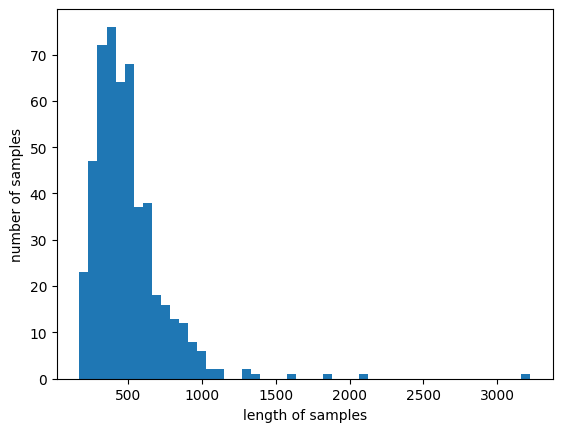

In [ ]:
print('◎ 판례의 최대 길이 :',max(len(l) for l in tok_X_train))

print('◎ 판례의 평균 길이 :',sum(map(len, tok_X_train))/len(tok_X_train))

plt.hist([len(s) for s in tok_X_train], bins=50)

#plt.style.use('dark_background')

plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [ ]:
# 최적의 리뷰 길이를 찾기 위해 함수를 정의


def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('◎ 전체 샘플 중 길이가 {} 이하인 샘플의 비율: {}'.format(max_len,round((cnt/len(nested_list))*100,3)),'%')


In [ ]:
# 위 그래프 참조하여 일단 리뷰 길이를 n으로 하여 확인 해봄
# n개보다 긴 애들은 그냥 포기.

max_len = 900

below_threshold_len(max_len, tok_X_train)


◎ 전체 샘플 중 길이가 900 이하인 샘플의 비율: 95.088 %


In [ ]:
# 모든 샘플의 길이를 n으로 맞추어 줌

pad_X_train = pad_sequences(tok_X_train, maxlen = max_len)

pad_X_test = pad_sequences(tok_X_test, maxlen = max_len)

# n 미만인 애들은 padding해서 0으로 채워

### **7) Multi-Kernel 1D CNN으로 네이버 영화 리뷰 분류**

In [ ]:

from keras.models import Sequential, Model

from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import load_model


In [ ]:
# 하이퍼 파라미터를 정의

embedding_dim = 128     # 단어 벡터

num_filters = 128       # 커널(필터) 개수


In [ ]:
# Functional API 사용
#
# 입력 층과 임베딩 층을 정의
vocab_size = 8537

model_input = Input(shape = (max_len,))    # 반드시 Input()을 이용하여 모델의 입력을 지정해 주어야 함 👈👈👈

# 아래 임베딩 층 설정시, 인자 input_length = max_len 는 생략 가능

a_out = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
#NLP에서는 Input 다음에 EMbedding함수 등장

a_out = Dropout(0.1)(a_out)    # 과적합 방지를 위해 drop


In [ ]:
# 3, 4, 5의 크기를 가지는 커널을 각각 128개 사용 - 그리고 이들을 maxpooling

conv_blocks = []

for size in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = size,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(a_out)

    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)



In [ ]:
# 각각 maxpooling한 결과를 연결(concatenate)
# 그리고 이를 밀집 층(dense layer)으로 연결

a_out = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]

a_out = Dropout(0.5)(a_out)

a_out = Dense(128, activation="relu")(a_out)

model_output = Dense(5, activation="softmax")(a_out) # fully connected 하기위해 Dense, 다중분류니까 sigmoid말고 softmax쓰기


model = Model(model_input, model_output)    # Model()을 이용하여 최종 모델을 구축 👈👈👈

model.summary()

# 아래 모델 출력에서
#__________________________________________________
# Layer (type)                   Output Shape
# =================================================
# conv1d (Conv1D)                (None, 28, 128)         28 = (30 - 3) + 1  /* max_len = 30, kernel_size = 3  */
# conv1d_1 (Conv1D)              (None, 27, 128)         27 = (30 - 4) + 1  /* max_len = 30, kernel_size = 4  */
# conv1d_2 (Conv1D)              (None, 26, 128)         26 = (30 - 5) + 1  /* max_len = 30, kernel_size = 5  */


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 900)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 900, 128)             1092736   ['input_4[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 900, 128)             0         ['embedding[0][0]']           
                                                                                                  
 conv1d (Conv1D)             (None, 898, 128)             49280     ['dropout[0][0]']             
                                                                                              

In [ ]:
# 모델 설계 후 모델 학습 과정을 설정
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0007)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"])  # 다중 분류를 수행


In [ ]:
# val_acc 이 5회 동안 개선되지 않으면 학습을 조기 종료(Early Stopping)
# ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

mc = ModelCheckpoint('best_model_CNN.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [ ]:
# 2~3분 정도 소요

start = time.time()    # 시작 시간 기록 ==============================


# epoch는 총 50번을 수행

history = model.fit(pad_X_train, y_train, batch_size = 64, epochs= 50, validation_data = (pad_X_test, y_test), verbose=1, callbacks=[es, mc]) #원본
#history = model.fit(pad_X_train, y_train, batch_size = 64, epochs=20, validation_data = (pad_X_test, y_test), verbose=1, shuffle=True) #


processing_time = time.time() - start    # 경과 시간 계산  ==============================
times = str(datetime.timedelta(seconds = processing_time))
print()
print('▶ 수행 시간 = ', times)



Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1.6123 - acc: 0.2043
Epoch 1: val_acc improved from -inf to 0.21429, saving model to best_model_CNN.h5
8/8 [==============================] - 22s 3s/step - loss: 1.6123 - acc: 0.2043 - val_loss: 1.6117 - val_acc: 0.2143
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1.5804 - acc: 0.2672
Epoch 2: val_acc did not improve from 0.21429
8/8 [==============================] - 22s 3s/step - loss: 1.5804 - acc: 0.2672 - val_loss: 1.6188 - val_acc: 0.2143
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1.5659 - acc: 0.2829
Epoch 3: val_acc improved from 0.21429 to 0.31746, saving model to best_model_CNN.h5
8/8 [==============================] - 15s 2s/step - loss: 1.5659 - acc: 0.2829 - val_loss: 1.6015 - val_acc: 0.3175
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1.5225 - acc: 0.3281
Epoch 4: val_acc did not improve from 0.31746
8/8 [==============================] - 14s

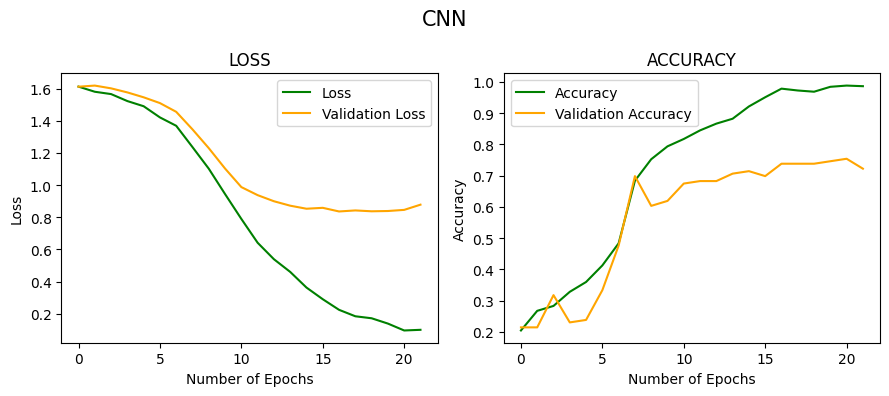

In [ ]:
fig = plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="green", label = "Loss")
plt.plot(history.history['val_loss'], color="orange", label = "Validation Loss")
plt.title("LOSS")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], color="green", label = "Accuracy")
plt.plot(history.history['val_acc'], color="orange", label = "Validation Accuracy")
plt.title("ACCURACY")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()

plt.suptitle("CNN", fontsize=15)
fig.tight_layout() # 사용하면 플롯간 여백을 조정

plt.show()

In [ ]:
# 학습 후에는 저장한 모델을 로드하여 테스트 데이터에 대해서 평가
# 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'best_model_CNN.h5'를 로드


loaded_model = load_model('best_model_CNN.h5')
acc = loaded_model.evaluate(pad_X_test, y_test)

print("\n ◎ 테스트 정확도: %.4f" % (loaded_model.evaluate(pad_X_test, y_test)[1])) #loss가 [0] 이고 acc가 [1]임


4/4 [==============================] - 1s 183ms/step - loss: 0.8461 - acc: 0.7540

 ◎ 테스트 정확도: 0.7540


In [ ]:
data = [acc]

# 데이터프레임 생성
df = pd.DataFrame(data, columns=['loss', 'accuracy'], index=['CNN'])
df

,loss,accuracy
CNN,0.846105,0.753968


### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = loaded_model.predict(pad_X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

y_test_re = np.argmax(y_test, axis=1)

# Confusion Matrix 생성
cm = confusion_matrix(y_test_re, y_pred)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(5))
disp.plot(cmap=plt.cm.Blues)
plt.title("CNN")
plt.style.use('default')
plt.show()

### 8) 결정문 예측해보기

In [ ]:
# 새로운 결정문의 카테고리를 예측하는 함수

# 기본적으로 현재 학습한 model에 새로운 입력에 대해서 예측값을 얻는 것은 model.predict()를 사용
# model.fit()을 할 때와 마찬가지로 새로운 입력에 대해서도 동일한 전처리를 수행하고
# model.predict()의 입력으로 사용해야 함

def sentiment_predict(new_sentence):
    new_sentence = okt.nouns(new_sentence) # 토큰화

    new_sentence = [word for word in new_sentence if  (len(word) > 1) and (not word in stopwords)] # 불용어 제거

    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩

    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩

    # 예측
    predictions = loaded_model.predict(pad_new)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률을 가진 클래스

    #class_labels = ['0', '1', '2', '3', '4']  # 실제 클래스 라벨로 변경
    class_labels = hunjea_cases['Category'].unique()

    print(f"\n◎ '위 문장은 {np.max(predictions) * 100:.2f}% 확률로 <{class_labels[predicted_class]}> 입니다.\n")


In [ ]:
# 예측 test

sentiment_predict('[사건 개요] 청구인들은 2020년 종합부동산세 과세기준일인 2020. 6. 1. 현재 주택 또는 토지를 소유한 자들이다. 나. 청구인들 주소지 관할 세무서장들은 2020. 11. 18.부터 같은 달 20.까지 사이에 청구인들에게 2020년 귀속 종합부동산세 및 농어촌특별세를 각 결정‧고지하였다(이하 청구인들에 대한 각 2020년 귀속 종합부동산세 및 농어촌특별세의 결정‧고지 모두를 가리킬 때에는 ‘이 사건 각 처분’이라 한다). 청구인들은 2021. 3. 15.부터 같은 해 7. 14.까지 사이에 이 사건 각 처분의 취소를 구하는 행정소송을 제기하였고, 당해 사건 계속 중 종합부동산세법 제7조 제1항, 제8조 제1항, 제9조 제1항, 제3항 내지 제7항, 제10조, 제12조 제1항, 제13조 내지 제15조에 대하여 위헌법률심판제청신청을 하였으나 이는 모두 기각되었다.다. 이에 청구인들은 2022. 8. 19.부터 2023. 2. 15.까지 사이에 걸쳐 이 사건 각 헌법소원심판을 청구하였다. 각 심판청구 사건의 구체적인 개요는 [별지 3] 기재와 같다. [심판 대상 조항] 구 종합부동산세법(2008. 12. 26. 법률 제9273호로 개정되고, 2020. 8. 18. 법률 17478호로 개정되기 전의 것) 제7조(납세의무자) ① 과세기준일 현재 주택분 재산세의 납세의무자로서 국내에 있는 재산세 과세대상인 주택의 공시가격을 합산한 금액이 6억 원을 초과하는 자는 종합부동산세를 납부할 의무가 있다. 제8조(과세표준) ① 주택에 대한 종합부동산세의 과세표준은 납세의무자별로 주택의 공시가격을 합산한 금액[과세기준일 현재 세대원 중 1인이 해당 주택을 단독으로 소유한 경우로서 대통령령으로 정하는 1세대 1주택자(이하 “1세대 1주택자”라 한다)의 경우에는 그 합산한 금액에서 3억 원을 공제한 금액]에서 6억 원을 공제한 금액에 부동산 시장의 동향과 재정 여건 등을 고려하여 100분의 60부터 100분의 100까지의 범위에서 대통령령으로 정하는 공정시장가액비율을 곱한 금액으로 한다. 다만, 그 금액이 영보다 작은 경우에는 영으로 본다.구 종합부동산세법(2018. 12. 31. 법률 제16109호로 개정되고, 2020. 8. 18. 법률 제17478호로 개정되기 전의 것) 제9조(세율 및 세액) ① 주택에 대한 종합부동산세는 다음 각 호와 같이 납세의무자가 소유한 주택 수에 따라 과세표준에 해당 세율을 적용하여 계산한 금액을 그 세액(이하 “주택분 종합부동산세액”이라 한다)으로 한다. 가) 종부세법 제7조 제1항 중 ‘공시가격’ 부분의 조세법률주의 위반 여부1) 종부세법 제7조 제1항에 의하면, 과세기준일 현재 주택분 재산세의 납세의무자로서 국내에 있는 재산세 과세대상인 주택의 공시가격 합산액이 6억 원을 초과하는 자는 종부세를 납부할 의무가 있다. 여기서의 ‘공시가격’의 구체적 의미를 이해하기 위해서는 종부세법뿐만이 아니라 ‘부동산 가격공시에 관한 법률’, 지방세법 등 관련법률 규정들을 함께 검토할 필요가 있다.종부세법은 “공시가격이라 함은 「부동산 가격공시에 관한 법률」에 따라 가격이 공시되는 주택 및 토지에 대하여 동법에 따라 공시된 가액을 말한다. 다만, 동법에 따라 가격이 공시되지 아니한 경우에는 「지방세법」 제4조 제1항 단서 및 같은 조 제2항에 따른 가액으로 한다.”라고 정의하고 있다(제2조 제9호).우선 ‘부동산 가격공시에 관한 법률’(이하 ‘부동산공시법’이라 한다)은 부동산의 적정가격 공시에 관한 사항 등을 규정함으로써 부동산의 적정한 가격형성과 각종 조세‧부담금 등의 형평성을 도모하기 위하여 제정되었는데(제1조), 여기서의 ‘적정가격’이란 “토지, 주택 및 비주거용 부동산에 대하여 통상적인 시장에서 정상적인 거래가 이루어지는 경우 성립될 가능성이 가장 높다고 인정되는 가격”을 뜻한다(제2조 제5호). 만일 종부세 과세대상인 특정 주택에 대하여 부동산공시법에 따라 공시된 가격이 없는 경우, ① 개별주택가격에 있어서는 특별자치시장‧특별자치도지사‧시장‧군수 또는 구청장(이하 ‘특별자치시장 등’이라 한다)이 같은 법에 따라 국토교통부장관이 제공한 표준주택과 산정대상 개별주택의 가격형성요인에 관한 표준적인 비교표(이하 ‘주택가격비준표’라 한다, 부동산공시법 제16조 제6항 참조)를 사용하여 산정한 가액이, ② 공동주택가격에 있어서는 대통령령으로 정하는 기준에 따라 특별자치시장 등이 산정한 가액이, ③ 새로 건축하여 건축 당시 개별주택가격 또는 공동주택가격이 공시되지 아니한 주택으로서 토지 부분을 제외한 건축물 등에 있어서는 거래가격, 신축가격 등을 고려하여 정한 기준가격에 종류, 구조, 용도 등을 고려하여 대통령령으로 정하는 기준에 따라 지방자치단체의 장이 결정한 가액이 각 종부세법 제2조 제9호에서의 ‘공시가격’이 된다(종부세법 제2조 제9호 단서, 지방세법 제4조 제1항 단서 및 제2항 참조). 이상의 규정들에 비추어 보면, 재산세나 종부세와 같은 부동산 보유세의 부과에 있어서 실제 거래가 일어나지 않은 상황에서는 부득이 일정한 기준에 의해 평가된 가액을 기준으로 과세할 수밖에 없는바, 종부세법 제2조 제9호에서의 ‘공시가격’은 실제 시장거래가격은 아니지만, 실제 거래가 아직 발생하지 않았기 때문에 현실적으로 실현된 가치는 없는 상황에서 실거래가액에 최대한 근접한 가액으로서의 의미를 가지고 있음을 알 수 있다. 위와 같이 종부세법 제7조 제1항은 다소 추상적이고 실거래가액 그 자체는 아니라는 한계를 가진 ‘공시가격’을 주택분 종부세의 납세의무자 설정 기준으로 삼고 있다. 주택의 ‘공시가격’을 주택분 종부세의 납세의무자 설정 기준으로 삼은 것이 조세법률주의에 합치되는지 여부는 결국 표준주택가격‧공동주택가격 산정방식의 적정성, 표준주택 선정의 적정성, 표준주택가격을 참작한 개별주택가격의 산정과정에 있어 행정부의 자의적 해석이나 집행을 견제할 수 있는 절차상 제한 및 산정방식의 적정성 담보 여부 등에 달려 있다고 볼 수 있다.부동산공시법은 아래와 같이 주택에 대한 공시가격의 결정‧공시에 관하여 여러 상세한 규정들을 두고 있다.가) 표준주택가격과 관련하여, 국토교통부장관은 용도지역, 건물구조 등이 일반적으로 유사하다고 인정되는 일단의 단독주택 중에서 선정한 표준주택에 대하여 매년 공시기준일 현재의 적정가격을 조사‧산정하고, 중앙부동산가격공시위원회의 심의를 거쳐 이를 공시하여야 한다(제16조 제1항). 중앙부동산가격공시위원회는 ① 부동산 가격공시 관계 법령의 제정‧개정에 관한 사항 중 국토교통부장관이 부의하는 사항, ② 표준지‧표준주택의 선정 및 관리지침과 표준지공시지가‧표준주택가격, ③ 공동주택의 조사 및 산정지침과 공동주택가격, ④ 표준지공시지가‧표준주택가격‧공동주택가격에 대한 이의신청에 관한 사항 등을 심의하기 위해 국토교통부장관 산하에 설치된 기관이다. 이는 위원장을 포함한 20명 이내의 위원으로 구성되는데, 국토교통부 제1차관이 위원장을 맡고, 기획재정부장관, 행정안전부장관, 농림축산식품부장관, 국토교통부장관이 지명하는 6명 이내의 공무원 및 국토교통부장관이 위촉하는 부동산 가격공시 또는 감정평가 관련 분야의 전문가들이 위원이 된다(제24조 제1항 내지 제4항, 같은 법 시행령 제71조 제2항). 아울러 국토교통부장관은 표준주택가격 조사‧산정 시 한국감정원법에 따라 설립된 한국감정원에 의뢰하여야 할 뿐만 아니라(제16조 제4항), 인근 유사 단독주택의 거래가격‧임대료, 해당 단독주택과 유사한 이용가치를 지닌다고 인정되는 단독주택의 건설에 필요한 비용추정액 등을 종합적으로 참작하여야 한다(제16조 제5항). 나아가 국토교통부장관은 개별주택가격 산정을 위해 필요하다고 인정하는 경우 주택가격비준표를 작성하여 시장‧군수‧구청장(이하 ‘시장 등’이라 한다)에게 제공하여야 한다(제16조 제6항). 그 밖에도 부동산공시법은 표준주택가격과 관련하여 해당 주택 소유자에 대한 의견청취절차, 국토교통부장관의 관계 행정기관에 대한 관련 자료의 열람‧제출 요구, 공시한 내용의 일반인 열람, 국토교통부장관에 대한 이의신청절차를 두고 있다(제16조 제7항, 제3조 제2항, 제4조, 제6조, 제7조).개별주택가격과 관련하여서도, 시장 등은 시‧군‧구부동산가격공시위원회의 심의를 거쳐 매년 표준주택가격의 공시기준일 현재 관할 구역 안의 개별주택의 가격을 결정‧공시하여야 하는데(제17조 제1항), 시‧군‧구부동산가격공시위원회는 개별공시지가‧개별주택가격의 결정, 개별공시지가‧개별주택가격에 대한 이의신청 등에 관한 사항을 심의하는 시장 등의 산하 기관이다(제25조 제1항). 이는 위원장 1명을 포함한 10명 이상 15명 이하의 위원들로 구성되는데, 부시장‧부군수 또는 부구청장이 위원장을 맡고, 시장 등이 지명하는 6명 이내의 공무원과 시장 등이 위촉하는 부동산 가격공시 또는 감정평가에 관한 학식과 경험이 풍부하고 해당 지역의 사정에 정통한 사람 등이 위원이 된다(같은 법 시행령 제74조 제1항 내지 제3항). 그리고 시장 등이 개별주택가격을 결정‧공시할 때에는 해당 주택과 유사한 이용가치를 지닌다고 인정되는 표준주택가격을 기준으로 주택가격비준표를 사용하여 가격을 산정하되, 해당 주택 가격과 표준주택가격이 균형을 유지하도록 하여야 하며(제17조 제5항), 특별한 사정이 없는 한 한국감정원의 검증절차, 토지소유자‧이해관계인 등의 의견청취절차를 거쳐야 한다(제17조 제6항). 개별주택가격에 이의가 있는 자 역시 시장 등에게 이의를 신청할 수 있다(제17조 제8항, 제11조).다) 공동주택가격과 관련하여서도, 국토교통부장관은 매년 공시기준일 현재의 적정가격을 조사‧산정하여, 앞서 언급한 중앙부동산가격공시위원회의 심의를 거쳐 이를 공시하여야 하고(제18조 제1항), 인근 유사 공동주택의 거래가격‧임대료 및 해당 공동주택과 유사한 이용가치를 지닌다고 인정되는 공동주택의 건설에 필요한 비용추정액 등을 종합적으로 참작하여야 하며(제18조 제5항), 공동주택가격 조사‧산정 시에도 한국감정원에 의뢰하여야 한다(제18조 제6항). 국토교통부장관의 관계 행정기관에 대한 관련 자료의 열람‧제출 요구, 공시한 내용의 일반인 열람, 국토교통부장관에 대한 이의신청절차 관련 규정 또한 마련되어 있다(제18조 제8항, 제4조, 제6조, 제7조).3) 위와 같은 종부세법 및 관련법률상의 공시가격의 의미와 절차적 규정들의 내용 등을 종합하여 보면, 법률이 직접 주택의 공시가격의 산정기준이나 절차, 한계를 정하고 있지 않다고 보기 어렵고, 그 규정 내용이 지나치게 추상적이고 불명확하여 국토교통부장관이나 시장 등에 의하여 공시가격이 자의적으로 결정되도록 방치하고 있다고 볼 수 없다.따라서 종부세법 제7조 제1항 중 ‘공시가격’ 부분은 조세법률주의에 위반되지 아니한다. (나) 종부세법 제8조 제1항, 제13조 제1항, 제2항의 포괄위임금지원칙 등 위반 여부1) 종부세법 제8조 제1항, 제13조 제1항, 제2항은 각각 주택분, 종합합산과세대상 토지분, 별도합산과세대상 토지분 종부세의 과세표준을 정하고 있다. 위 조항들에 의하면, 종부세의 과세표준은 납세의무자별로 각 과세대상 물건의 공시가격 합산액에서 일정 금액을 공제한 금액에 부동산 시장의 동향과 재정 여건 등을 고려하여 100분의 60부터 100분의 100까지의 범위에서 대통령령으로 정하는 공정시장가액비율을 곱한 금액이다. 이와 관련하여 먼저 청구인들은 종부세법 제8조 제1항 중 ‘공정시장가액비율’ 부분은 관련 조항들의 내용을 살펴보더라도 그 내용을 알기 어려워 조세법률주의에 위반된다거나, 종부세법 시행령으로 ‘공정시장가액비율’을 일률적으로 인상하는 것은 의회유보원칙에 위반된다고 주장하는데, 이는 실질적으로 종부세법 제8조 제1항이 과세표준 산정을 위한 일종의 조정계수인 ‘공정시장가액비율’을 대통령령으로 정하도록 하고 법률에서 직접 그 구체적 수치를 정하지 않은 것을 문제삼는 것이다. 그런데 종부세법은 종부세 과세요건의 핵심적 사항들인 납세의무자 기준, 과세표준 구간 및 그에 따른 구체적 세율을 직접 정하고 있고, 대통령령에 위임된 ‘공정시장가액비율’의 구체적 수치는 우리나라 부동산 시장의 변동성, 부동산 가격의 흐름, 부동산정책의 방향, 경제사정의 변동 등 제반 여건을 고려하여 규율할 필요가 있는 세부적‧기술적 사항이므로 입법자 스스로 규율하여야 할 본질적 사항이라고 보기 어렵다. 따라서 청구인들의 위와 같은 주장은 받아들일 수 없다.')



1/1 [==============================] - 0s 26ms/step

◎ '위 문장은 73.84% 확률로 <경제 · 재산권 · 조세관계에 관한 결정> 입니다.



In [ ]:
# 예측 test

sentiment_predict('[사건개요] 가. 한국불교태고종선암사는 2014. 12. 15. 청구인과 윤○○을 상대로 등기명의인표시변경등기말소 청구의 소를 제기하였고, 1심 법원은 2016. 7. 14. ‘한국불교태고종선암사의 청구인에 대한 소 중 각 등기명의인 표시경정등기 및 등기명의인 표시변경 등기의 말소등기절차 이행청구 부분, 윤○○에 대한 소를 각 각하하고, 청구인은 한국불교태고종선암사에게 청구인 명의로 마쳐진 소유권보존등기의 말소등기절차를 이행하라’는 판결을 선고하였다(광주지방법원 순천지원 2014가합3543).나. 이에 청구인이 항소하였고, 항소심 법원은 2022. 7. 7. ‘한국불교태고종선암사의 윤○○에 대한 소 중 각 등기명의인 표시경정등기 및 등기명의인 표시변경등기의 말소등기절차 이행청구 부분, 청구인에 대한 소를 각 각하하고, 윤○○은 한국불교태고종선암사에게 청구인 명의로 마쳐진 소유권보존등기의 말소등기절차를 이행하라’는 판결을 선고하였다(광주고등법원 2016나14088, 이하 ‘재심대상판결’이라 한다). 이에 청구인과 윤○○이 상고하였으나, 2022. 11. 17. 심리불속행으로 기각되었다(대법원 2022다263073).다. 청구인은 재심대상판결에 민사소송법 제451조 제1항 제9호의 재심사유가 있다고 주장하며 2022. 12. 24. 재심의 소를 제기하였으나, 2023. 10. 25. 각하되어 2023. 11. 17. 확정되었다(당해 사건).라. 청구인은 당해 사건 계속 중, 주위적으로 민사소송법 제451조 제1항 제9호 중 ‘상소에 의하여 그 사유를 주장하였거나’ 부분이 헌법에 위반되고, 예비적으로 위 조항을 ‘당사자가 상고심에서 그 사유를 주장하였으나 심리불속행 기각된 경우까지 포함된다’라고 해석하는 것은 헌법에 위반된다고 주장하며 위헌법률심판제청신청을 하였다. 법원은 2023. 10. 25. 주위적 신청은 기각하고 예비적 신청은 각하하였다(광주고등법원 2023카기1010). 청구인은 2023. 11. 17. 이 사건 헌법소원심판을 청구하였다. [심판대상조항]민사소송법(2002. 1. 26. 법률 제6626호로 전부개정된 것)제451조(재심사유) ① 다음 각 호 가운데 어느 하나에 해당하면 확정된 종국판결에 대하여 재심의 소를 제기할 수 있다. 다만, 당사자가 상소에 의하여 그 사유를 주장하였거나, 이를 알고도 주장하지 아니한 때에는 그러하지 아니하다.9. 판결에 영향을 미칠 중요한 사항에 관하여 판단을 누락한 때 [청구인의 주장]심판대상조항은 재심사유를 제한함으로써 법적 안정성을 도모하고 사법자원을 효율적으로 활용하기 위한 것인바, 상고이유의 제출기한을 단축하거나 심판대상조항에서 규정한 재심 제한사유에 해당하는 경우 특별히 단기의 심리기한을 두는 등의방식으로도 위 입법목적을 충분히 달성할 수 있다. 특히 심리불속행 기각판결은 판결의 이유를 기재하지 않는 경우가 일반적인데, 이러한 경우까지 상고이유에 대한 판단이 이루어진 것으로 보아 재심을 제한하는 것은 소송당사자의 재판청구권을 과도하게 침해하는 것이다.심판대상조항은 상소이유로 주장하기만 했으면 일률적으로 재심을 청구할 수 없도록 하고 있는바, 무익한 상고나 남상고에 해당하는 경우와 그렇지 않은 경우를 동일하게 취급하고 있으므로 소송당사자의 평등권을 침해한다.법원은 민사소송법 제424조 제1항 제6호의 이유불비와 심판대상조항의 판단누락을 동일한 개념으로 파악하여 상고이유로 이유불비를 주장한 경우에는 재심을 제기할 수 없다고 판단하고 있는바, 이는 심판대상조항의 ‘판단누락’ 개념이 불분명하기 때문이므로 심판대상조항은 명확성원칙에 위반된다. [판단] 헌법재판소 선례헌법재판소는 다수의 사건에서 심판대상조항을 포함한 민사소송법 제451조 제1항 제9호(이하 ‘선례조항’이라 한다)가 헌법에 위반되지 않는다고 판단하였다(헌재 2013. 6. 27. 2012헌바414; 헌재 2014. 1. 28. 2013헌바54; 헌재 2016. 12. 29. 2016헌바43; 헌재 2017. 6. 29. 2017헌바55; 헌재 2017. 7. 27. 2016헌바455등; 헌재 2019. 2. 28. 2016헌바457; 헌재 2020. 12. 23. 2018헌바459; 헌재 2023. 7. 20. 2021헌바9). 그 요지는 다음과 같다.『(1) 명확성원칙 위반 여부 선례조항은 ‘판결에 영향을 미칠 중요한 사항’이라고 하여 누락된 판단 사항의 중요성을 요구하고 있다. 재심제도의 입법취지에 비추어 보면, ‘판결에 영향을 미칠 중요한 사항’이라 함은 그 판단 여하에 따라 판결의 결론에 영향을 미치는 사항, 즉 당사자가 소송상 제출한 공격방어방법으로서 판결주문에 영향이 있는 것을 의미함을 알 수 있고, 대법원도 이와 같이 해석하고 있다(대법원 2000. 7. 6. 선고 2000재다193 판결 등 참조).선례조항은 ‘판단을 누락한 때’라고 하여 판결 이유 중에 판단을 명시하지 아니한 경우일 것을 요구하고 있는데, 어떠한 경우가 판단누락에 해당하는지에 관하여는 다수의 관련 선례들이 선고되어 그 의미내용이 비교적 명확하게 정립되어 있다. 즉, 판결에는 주문이 정당하다는 것을 인정할 수 있을 정도로 당사자의 주장, 그 밖의 공격방어방법에 관한 판단을 표시하면 되고 당사자의 모든 주장이나 공격방어방법에 관하여 판단할 필요가 없고, 판단이 있는 이상 그 판단에 이르는 이유가 소상하게 설시되어 있지 아니하거나 당사자의 주장을 배척하는 근거를 일일이 개별적으로 설명하지 아니하더라도 판단누락이 아니며, 설령 실제로 판단을 하지 아니하였다고 하더라도 그 주장이 배척될 경우임이 분명한 때에는 판결 결과에 영향이 없어 판단누락이 아니라는 대법원 판례가 형성되어 있다(대법원 2008. 7. 10. 선고 2006재다218 판결; 대법원 2011. 12. 8. 선고 2011재두100 판결 등 참조).따라서 선례조항의 의미를 해석함에 있어 재심제도의 입법취지, 관련 규정의 종합적인 해석에 의하여 그 내용이 구체화될 수 있고, 이미 확립된 판례에 기초하여 그 해석 및 적용에 대한 신뢰성이 있는 원칙을 도출할 수 있어 해석자 개인의 주관적인 판단에 따라 그 해석이 좌우될 가능성이 없으므로, 선례조항은 명확성원칙에 위배되지 아니한다.(2) 재판청구권 침해 여부 선례조항은 불필요한 재심이나 재심의 남용을 방지함으로써 확정된 종국판결의 법적 안정성을 유지하고 재심을 통한 분쟁해결의 실효성과 사법자원의 효율적 활용을 도모하는 것을 그 목적으로 하고 있으므로, 그 입법목적의 정당성이 인정된다. 소송당사자가 민사소송법 제451조 제1항의 재심사유를 상소심에서 이미 주장하여 판단을 받았다면, 이러한 사유를 재심사유로 하여 재심의 소를 제기하는 것을 허용해야 할 만큼 정의의 요청이 절박하다고 보기 어렵고, 이를 허용하는 경우 불필요한 재심이 제기되어 입법목적을 달성하기 어려워진다. 그리고 상소를 제기할 수 있는 때 재심사유의 존재를 알고도 상소심에서 그 사유를 주장하지 아니하였거나 상소 자체를 제기하지 아니한 경우에는 상소심에서 재심사유에 관하여 판단 받을 기회를 스스로 포기한 것이므로, 이러한 경우까지 재심을 통하여 구제를 허용할 필요성은 거의 없다. 따라서 이러한 경우 재심의 소를 제기할 수 없도록 한 것이 입법형성권의 한계를 벗어나 그 내용이 자의적이라고 하기 어렵다. 한편 헌법재판소는 심리불속행제도 자체와 심리불속행 상고기각판결에서 이유를 기재하지 않을 수 있도록 한 ‘상고심절차에 관한 특례법’의 관련 조항들이 헌법에 위반되지 않는다고 여러 차례 결정하였다. 또 소송당사자가 민사소송법 제451조 제1항 제9호의 재심사유를 상고이유로 주장하였으나 심리불속행으로 기각되어 이유 기재 없는 판결을 받는 경우에는 상고이유로 주장한 재심사유가 심리속행사유로 인정되지 않는다는 판단이 이루어진 것이다. 이러한 점을 고려하면, 선례조항이 이유 기재 없는 심리불속행 상고기각판결에까지 적용되는 것이 합리적이지 않다거나 재판청구권의 본질을 심각하게 훼손하여 입법형성권의 한계를 벗어났다고 보기 어렵다. 따라서 선례조항은 재판청구권을 침해하지 않는다.』나. 선례 변경의 필요성 여부 위 선례들의 결정 이유는 이 사건에서도 그대로 타당하고 이와 달리 판단할 사정변경이나 필요성이 없으므로, 이 사건에서도 위 견해를 그대로 유지하기로 한다.다. 평등권 침해 여부청구인은 심판대상조항이 무익한 상고 내지 남상고에 해당하는 경우와 그렇지 않은 경우를 동일하게 취급하여 평등권을 침해한다고 주장하나, 이는 심판대상조항이 재심사유를 일률적으로 제한하고 있어 재판청구권을 침해한다는 주장과 다르지 않으므로 이 부분 주장은 더 나아가 살펴볼 필요 없이 이유 없다.라. 소결따라서 심판대상조항은 명확성원칙에 반하지 아니하고 재판청구권을 침해하지 아니한다.')


1/1 [==============================] - 0s 24ms/step

◎ '위 문장은 78.20% 확률로 <절차적 기본권 및 형사관계에 관한 결정> 입니다.



In [ ]:
# 예측 test

sentiment_predict('[사건개요]가. 청구인들은 국민건강보험공단 등을 비롯한 ‘개인정보 보호법’상 개인정보처리자에게 개인정보를 제공한 정보주체이자, 은행 및 신용카드 회사에 개인신용정보를 제공하고 서비스를 이용하고 있거나 의료 관련 보험에 가입한 사람들이다.나. 청구인들은 개인정보처리자는 통계작성, 과학적 연구, 공익적 기록보존 등을 위하여 정보주체의 동의 없이 가명정보를 처리할 수 있다고 규정한 ‘개인정보 보호법’ 제28조의2, 신용정보제공ㆍ이용자, 신용정보회사, 신용정보집중기관(이하 ‘신용정보회사 등’이라 한다)이 통계작성, 연구, 공익적 기록보존 등을 위하여 가명정보를 제공하는 경우에는 신용정보주체로부터 개별적으로 동의를 받지 않아도 된다고 규정한 ‘신용정보의 이용 및 보호에 관한 법률’(이하 ‘신용정보법’이라 한다) 제32조 제6항 제9호의2, 제33조 제2항이 청구인들의 개인정보자기결정권을 침해한다고 주장하며, 2020. 11. 2. 이 사건 헌법소원심판을 청구하였다. [심판대상조항]개인정보 보호법(2020. 2. 4. 법률 제16930호로 개정된 것)제28조의2(가명정보의 처리 등) ① 개인정보처리자는 통계작성, 과학적 연구, 공익적 기록보존 등을 위하여 정보주체의 동의 없이 가명정보를 처리할 수 있다.신용정보의 이용 및 보호에 관한 법률(2020. 2. 4. 법률 제16957호로 개정된 것)제32조(개인신용정보의 제공ㆍ활용에 대한 동의) ⑥ 신용정보회사등(제9호의3을 적용하는 경우에는 데이터전문기관을 포함한다)이 개인신용정보를 제공하는 경우로서 다음 각 호의 어느 하나에 해당하는 경우에는 제1항부터 제5항까지를 적용하지 아니한다.9의2. 통계작성, 연구, 공익적 기록보존 등을 위하여 가명정보를 제공하는 경우. 이 경우 통계작성에는 시장조사 등 상업적 목적의 통계작성을 포함하며, 연구에는 산업적 연구를 포함한다. 판단 가. 가명정보 제도의 개관(1) 심판대상조항의 입법경위 및 입법취지 데이터 활용의 중요성이 대두되고 산업계에서 이에 대한 수요가 늘어나면서, 2016. 6.경 관계부처 합동으로 ‘개인정보 비식별조치 가이드라인’이 마련되었다. 이 가이드라인은 가명처리, 범주화 등 다양한 기술을 활용하여 개인정보에서 정보주체를 식별할 수 있는 요소를 제거한 뒤 적정성 평가를 거쳐 동의 없는 활용이 가능하도록 하였다. 이후 가명처리 및 가명정보의 개념과 이에 대한 활용의 범위를 법률에 규정할 필요성이 대두되었고, 이에 대한 논의 과정에서 정보주체의 동의 없이 가명정보를 활용할 수 있는 범위에 영리 목적을 포함할 것인지 여부에 대한 논의가 본격화되었다.이와 관련한 다수의 ‘개인정보 보호법’ 일부개정법률안이 발의되었는데, 그중에는 가명정보 활용의 목적 범위를 “통계작성, 과학적 연구, 공익적 기록보존 등”으로 규정하면서 제안이유에서 “새로운 기술ㆍ제품ㆍ서비스의 개발 등 산업적 목적을 포함하는 과학적 연구, 시장조사 등 상업적 목적의 통계작성” 등을 포함한다고 명시한 안(의안번호 제2016621호)도 있었고, “통계작성, 학술연구, 공익적 기록보존”으로 목적을 한정한 안(의안번호 제2016668호)도 있었다.결국 2020. 2. 4. 법률 제16930호로 개정된 ‘개인정보 보호법’은 “개인정보처리자는 통계작성, 과학적 연구, 공익적 기록보존 등을 위하여 정보주체의 동의 없이 가명정보를 처리할 수 있다.”라고 규정하여 가명정보의 활용범위를 정하면서(제28조의2 제1항), ‘과학적 연구’란 “기술의 개발과 실증, 기초연구, 응용연구 및 민간 투자 연구 등 과학적 방법을 적용하는 연구를 말한다.”라고 정의하였다(제2조 제8호). 위와 같이 신설된 개인정보조항은 데이터 관련 신산업 육성이 범국가적 과제로 대두되고 인공지능, 클라우드, 사물인터넷 등 신기술을 활용한 데이터 이용이 필요한 상황에서 데이터의 이용을 활성화하고자 하는 데 그 입법취지가 있다.개인정보조항이 신설되기 전의 구 ‘개인정보 보호법’(2020. 2. 4. 법률 제16930호로 개정되기 전의 것)은 개인정보처리자는 통계작성 및 학술연구 등의 목적을 위하여 필요한 경우로서 특정 개인을 알아볼 수 없는 형태로 개인정보를 제공하는 경우에는 정보주체 또는 제3자의 이익을 부당하게 침해할 우려가 있을 때를 제외하고는 개인정보를 목적 외의 용도로 이용하거나 이를 제3자에게 제공할 수 있다고 규정하였는데(제18조 제2항 제4호), 개인정보조항이 신설되면서 이 조항은 삭제되고 그보다 더 넓은 범위를 포괄하는 개인정보조항이 이를 대체하는 역할을 하게 되었다.한편, 위와 같은 취지에서 신용정보법에도 개인신용정보를 가명처리한 가명정보의 활용에 관한 조항이 함께 도입되었다. 특히 금융분야는 체계적으로 관리되는 정형화된 데이터가 대량으로 축적되어 있어 개인의 특성을 반영한 맞춤형 금융상품의 개발이나 다른 산업분야와의 융합까지도 가능하게 되는 등 혁신성장의 혜택이 국민의 삶과 직결되어 있어 데이터의 활용가치가 매우 높다는 사정 등을 고려하여, 2020. 2. 4. 법률 제16957호로 개정된 신용정보법은 신용정보회사 등이 통계작성(시장조사 등 상업적 목적의 통계작성을 포함), 연구(산업적 연구를 포함), 공익적 기록보존 등을 위하여 가명정보를 제공하는 경우에, 그 가명정보를 타인에게 제공하려는 신용정보제공ㆍ이용자나 개인신용평가회사, 개인사업자신용평가회사, 기업신용조회회사 또는 신용정보집중기관으로부터 가명정보를 제공받으려는 자가 신용정보주체의 동의를 받지 않아도 되도록 하였다(제32조 제6항 제9호의2 참조).(2) ‘유럽연합(EU) 일반 개인정보 보호법’상의 유사 규정‘유럽연합(EU) 일반 개인정보 보호법’(General Data Protection Regulation, 이하 ‘GDPR’이라 한다)은 개인정보 보호에 관한 유럽연합의 규정으로서, 국가 간 개인정보의 이전이 빈번해진 상황에서 다른 나라의 개인정보 관련 법제에도 많은 영향을 미치고 있다. 우리 ‘개인정보 보호법’ 개정 과정에서도 GDPR을 참고한 바 있다. GDPR은 우리 ‘개인정보 보호법’보다 앞서 가명처리의 개념을 도입하였고 그 개념은 ‘개인정보 보호법’상 가명처리의 개념과 유사하다. 그러나 규정의 체계상 가명처리에 따른 법률효과에는 차이가 있다. GDPR에는 개인정보가 가명처리되었다는 사실 자체만으로 이를 제한된 목적으로 정보주체의 동의 없이 처리할 수 있도록 허용하는 규정은 존재하지 않는다. 대신 개인정보의 목적 외 이용을 허용하는 규정에 의해서 결과적으로는 개인정보조항과 유사한 가명정보 활용을 허용하고 있다. 구체적으로 살펴보면, GDPR은 개인정보를 처리하기 위해서는 정보주체의 동의 등 적법한 근거가 필요하다고 규정하고(제6조 제1항 참조), 개인정보를 수집할 때는 처리 목적을 구체적으로 특정하여야 하고 그 목적과 양립가능하지 않은 방향으로 추가 처리해서는 안 된다는 원칙을 두고 있다[제5조 제1항 (b) 전문 참조]. 그런데 그와 동시에 “공익적 기록보존 목적, 과학적 또는 역사적 연구 목적, 통계 목적”으로 추가 처리하는 경우로서 제89조 제1항을 준수하는 경우에는 당초의 목적과 양립가능한 추가 처리로 간주한다[제5조 제1항 (b) 후문 참조]. 제89조 제1항은 “공익적 기록보존 목적, 과학적 또는 역사적 연구 목적, 통계 목적”을 위하여 정보를 처리할 때에는 정보주체의 권리와 자유 보장을 위하여 적절한 보호조치를 하여야 한다고 규정하면서, 특히 정보 최소화의 원칙을 준수하기 위한 기술적ㆍ관리적 조치가 확보되도록 해야 하며, 이러한 조치에는 가명처리를 통해서 처리 목적을 달성할 수 있다면 가명처리가 포함될 수 있고, 정보주체를 식별할 수 없는 방식으로도 처리 목적을 달성할 수 있다면 그러한 방식으로 처리하여야 한다고 규정한다. 즉, GDPR에서 가명처리는 정보주체의 권리를 보호하기 위한 조치의 대표적인 예로 규정되어 있다.한편, GDPR은 원칙적으로는 민감정보의 처리를 금지하되, 당초의 목적과 상당한 관계에 있고 정보주체의 권리를 보호하기 위한 적절한 조치를 제공하며 제89조 제1항을 준수하는 경우로서 “유럽연합법 또는 회원국법에 따라 공익적 기록보존 목적, 과학적 또는 역사적 연구 목적, 통계 목적”으로 처리하는 경우라면 예외적으로 민감정보를 처리할 수 있다고 규정하고 있다[제9조 제2항 (j) 참조]. 따라서 GDPR의 다른 규정을 통하여 정보주체의 동의 없는 처리가 허용되는 경우는 별론으로 하고, 적어도 제5조 제1항 (b) 후문 및 제9조 제2항 (j)에 따라 예외가 인정되는 경우에 그 문언에서 명시한 목적의 범위는 “공익적 기록보존 목적, 과학적 또는 역사적 연구 목적, 통계 목적”으로 한정되어 있다.(3) 심판대상조항이 규정한 가명정보의 활용 범위 일반적으로 법령에서 하나 또는 수개의 사항을 열거하고 그 뒤에 ‘등’을 사용할 경우 열거된 사항은 예시사항으로 보고, 특별한 이유가 없는 한 그 ‘등’에는 열거된 예시사항과 규범적 가치가 동일하거나 그에 준하는 성질을 가지는 사항이 포함되는 것으로 해석한다. 그러나 앞서 살펴본 심판대상조항의 입법과정에서 알 수 있듯이, 목적의 범위에 관해 다양한 견해가 제시됨에 따라 이를 아우르는 과정에서 ‘등’이라는 표현을 사용하게 된 것에 불과하고, 심판대상조항에 ‘등’을 사용한 것이 통계작성, 연구, 공익적 기록보존 외에 이에 준하는 다른 목적을 위해서도 정보주체의 동의 없는 가명정보 활용이 가능하도록 그 범위를 무한히 확장하는 취지라고 보기는 어렵다.특히, ‘개인정보 보호법’에 따르면 정보주체는 개인정보의 처리에 관한 동의 여부, 동의 범위 등을 선택하고 결정할 권리를 가지는 것이 원칙이고(제4조 제2호 참조), 심판대상조항은 이에 대한 예외를 규정하고 있으므로, 예외규정을 되도록 확장해석해서는 안 되는 법해석의 일반원칙을 감안한다면 심판대상조항이 허용하는 가명정보 활용의 목적은 법문에 명시된 범위 내로 제한된다고 보아야 한다. 입법자의 의도가 가명정보 활용의 목적 범위를 이보다 더 확대하는 것이라면 이는 정보주체의 개인정보자기결정권을 추가적으로 제한하게 되므로 법문에 명확히 규정되어야 할 것이다.따라서 개인정보조항의 경우 “통계작성, 과학적 연구, 공익적 기록보존”, 신용정보조항의 경우 ‘통계작성(시장조사 등 상업적 목적의 통계작성을 포함), 연구(산업적 연구를 포함), 공익적 기록보존’이라는 법문에서 명시적으로 규정하고 있는 목적에 한하여 정보주체의 동의 없이 가명정보를 처리할 수 있도록 규정하고 있다고 보아야 하고, 위와 같이 명시된 범위를 넘어 통계나 연구에 준하는 다른 목적으로 활용하는 것은 법률에서 허용한 범위를 벗어난다고 할 것이다.나. 개인정보자기결정권 침해 여부 (1) 제한되는 기본권 개인정보자기결정권은 자신에 관한 정보가 언제 누구에게 어느 범위까지 알려지고 또 이용되도록 할 것인지를 그 정보주체가 스스로 결정할 수 있는 권리로서, 헌법 제10조 제1문에서 도출되는 일반적 인격권 및 헌법 제17조의 사생활의 비밀과 자유에 의하여 보장된다. 이와 같이 개인정보의 공개와 이용에 관하여 정보주체 스스로가 결정할 권리인 개인정보자기결정권의 보호대상이 되는 개인정보는 개인의 신체, 신념, 사회적 지위, 신분 등과 같이 개인의 인격주체성을 특징짓는 사항으로서 그 개인의 동일성을 식별할 수 있게 하는 일체의 정보라고 할 수 있다. 또한 그러한 개인정보를 대상으로 한 조사ㆍ수집ㆍ보관ㆍ처리ㆍ이용 등의 행위는 모두 원칙적으로 개인정보자기결정권에 대한 제한에 해당한다(헌재 2012. 12. 27. 2010헌마153).가명정보는 원래의 상태로 복원하기 위한 추가 정보의 사용ㆍ결합을 통해서 특정 개인을 알아볼 수 있는 정보이므로 개인정보자기결정권의 보호대상이 되는 개인정보에 해당한다. 심판대상조항은 신용정보회사 등을 포함하는 개인정보처리자로 하여금 통계작성 등을 위하여 정보주체의 동의 없이 가명정보를 처리할 수 있도록 하므로, 심판대상조항이 정보주체인 청구인들의 개인정보자기결정권을 침해하는지 살펴보기로 한다.(2) 과잉금지원칙 위반 여부(가) 목적의 정당성 및 수단의 적합성 심판대상조항은 데이터 관련 신산업 육성이 범국가적 과제로 대두되고 인공지능, 클라우드, 사물인터넷 등 신기술을 활용한 데이터 이용이 필요한 상황에서, 통계작성, 연구, 공익적 기록보존을 위한 데이터의 이용을 활성화하기 위하여 도입된 것이다. 데이터의 이용을 활성화함으로써 신산업을 육성하고 통계작성, 연구, 공익적 기록보존을 보다 효과적으로 수행하는 것은 궁극적으로는 데이터를 이용하는 주체뿐만 아니라 사회 전체의 편익에 기여하는 것으로서, 심판대상조항은 입법목적의 정당성이 인정된다. 심판대상조항이 가명정보를 정보주체의 동의 없이 처리할 수 있도록 하는 것은 이와 같은 입법목적 달성을 위하여 적합한 수단이다.(나) 침해의 최소성1) 기술이 발달하면서 방대한 데이터의 수집과 처리가 용이해진 상황에서, 이를 활용하여 관련 산업을 육성하고 국가경쟁력을 확보하며 여러 분야에서 효율과 편익을 증대하기 위해서 데이터의 이용을 활성화할 필요가 있는 한편, 개인정보의 수집과 이용에 대한 수요가 급증하는 와중에 정보주체의 개인정보자기결정권을 충분히 보호하기 위한 방편도 마련되어야 한다. 데이터를 처리할 때 특정 개인을 알아볼 수 없는 상태로 처리한다면 정보주체를 가장 잘 보호할 수 있으나, 다른 정보를 사용하여도 더 이상 특정 개인을 알아볼 수 없는 익명정보는 서로 다른 정보집합물 사이의 결합 등이 불가능하므로, 그 활용도에 한계가 있다. 예를 들어 보건의료 분야는 정보집약적인 연구의 필요성과 효용성이 큰 분야이자 여러 요소들 간의 상호관계를 파악하거나 시간에 따른 변화를 추적하는 것이 필요한 경우가 많은 분야로서, 익명정보만으로는 충분한 활용에 한계가 있다. 이러한 경우 다른 기관이 보유한 정보집합물과의 결합 등이 가능한 가명정보의 형태로 개인정보를 처리하면 보다 폭넓은 활용이 가능하다. 이에 ‘개인정보 보호법’은 익명정보만으로 목적을 달성할 수 없는 경우에 한하여 개인정보를 가명에 의하여 처리할 수 있도록 하고 있다(제3조 제7항 참조).이러한 가명정보는 추가 정보의 사용ㆍ결합 없이는 특정 개인을 알아볼 수 없는 정보이고(개인정보 보호법 제2조 제1항 다목 참조), 특정 개인을 알아보기 위한 목적으로 가명정보를 처리하는 것은 금지되므로(같은 법 제28조의5 제1항 참조), 가명처리된 이후에 다시 정보주체를 특정하여 별도로 동의를 받는 것을 상정하기 어렵다. 따라서 정보주체의 동의 없이도 가명정보를 처리할 수 있도록 하면 보다 자유로운 데이터 활용이 가능하다.2) 개인정보의 종류 및 성격, 수집목적, 이용형태, 정보처리방식 등에 따라 개인정보자기결정권의 제한이 인격권 또는 사생활의 자유에 미치는 영향이나 침해의 정도는 달라진다. 가명정보의 경우 원래의 정보로 복원하기 위한 추가 정보의 사용ㆍ결합 없이 그 자체만으로는 특정 개인을 알아볼 수 없고 극히 예외적인 경우에만 정보주체의 식별이 이루어지므로, 일반적인 개인정보에 비해 정보주체의 인격권이나 사생활의 자유에 미치는 영향이 크지 않다.앞서 살펴본 것처럼 심판대상조항은 개인정보처리자가 정보주체의 동의 없이 가명정보를 처리할 수 있는 목적을 “통계작성, 연구, 공익적 기록보존”으로 한정하고 있으므로 그 밖에 다른 목적으로는 활용이 제한된다.따라서 심판대상조항은 개인정보 중에서도 가명정보에 대해서, 제한된 목적으로 정보주체의 동의 없이 가명정보를 처리할 수 있도록 함으로써 기본권 침해를 최소화하고 있다.3) ‘개인정보 보호법’은 가명정보 활용 과정에서 정보주체를 보호하기 위하여 여러 의무를 규정하고, 위반 시 제재를 가하고 있다.먼저, 가명정보의 처리 과정에서 필요한 보호조치를 충분히 하도록 규정하고 있다. 개인정보처리자가 “통계작성, 과학적 연구, 공익적 기록보존”을 위하여 정보주체의 동의 없이 가명정보를 처리하는 경우 또는 이와 같은 목적을 위하여 전문기관을 통하여 서로 다른 개인정보처리자 간의 가명정보를 결합하거나 결합을 수행한 기관 외부로 결합된 정보를 반출하려는 경우에는, 원래의 상태로 복원하기 위한 추가 정보를 별도로 분리하여 보관ㆍ관리하는 등 해당 정보가 분실ㆍ도난ㆍ유출ㆍ위조ㆍ변조 또는 훼손되지 않도록 대통령령으로 정하는 바에 따라 안전성 확보에 필요한 기술적ㆍ관리적 및 물리적 조치를 하여야 하며(제28조의4 제1항), 이를 위반하여 안전성 확보에 필요한 조치를 하지 아니한 자에게는 3천만 원 이하의 과태료를 부과한다(제75조 제2항 제5호). 개인정보처리자가 위와 같이 가명정보를 처리하고자 하는 경우에는 가명정보의 처리 목적, 제3자 제공 시 제공받는 자, 가명정보의 처리 기간 등 가명정보의 처리 내용을 관리하기 위하여 대통령령으로 정하는 사항에 대한 관련 기록을 작성하여 보관하여야 하며, 가명정보를 파기한 경우에는 파기한 날부터 3년 이상 보관하여야 한다(제28조의4 제3항). 이를 위반하여 관련 기록을 작성하여 보관하지 아니한 자에게는 1천만 원 이하의 과태료를 부과한다(제75조 제4항 제7호). 개인정보처리자는 가명정보의 처리 기간을 정한 경우 그 기간이 경과하면 파기하고, 파기할 때에는 복구 또는 재생되지 아니하도록 조치하여야 하며, 다른 법령에 따라 파기하지 아니하고 보존하여야 하는 경우에는 해당 개인정보 또는 개인정보파일을 다른 개인정보와 분리하여서 저장ㆍ관리하여야 한다(제21조, 제28조의4 제2항 참조). 이를 위반하여 개인정보의 파기 등 필요한 조치를 하지 아니한 자에게는 3천만 원 이하의 과태료를 부과한다(제75조 제2항 제4호).다음으로, 가명정보를 이용하여 특정 개인을 재식별하는 것을 금지하고 있다. 개인정보처리자는 개인정보조항에 따라 가명정보를 제3자에게 제공하는 경우에는 특정 개인을 알아보기 위하여 사용될 수 있는 정보를 포함해서는 아니 되고(제28조의2 제2항), “통계작성, 과학적 연구, 공익적 기록보존”을 위하여 정보주체의 동의 없이 가명정보를 처리하는 자 또는 그와 같은 목적을 위하여 서로 다른 개인정보처리자 간에 가명정보를 결합하는 자가 특정 개인을 알아보기 위한 목적으로 가명정보를 처리하는 것은 금지된다(제28조의5 제1항 참조). 제28조의2를 위반하여 개인정보를 이용하거나 제3자에게 제공한 자 및 그 사정을 알면서도 영리 또는 부정한 목적으로 개인정보를 제공받은 자, 제28조의5 제1항을 위반하여 특정 개인을 알아보기 위한 목적으로 가명정보를 처리한 자는 5년 이하의 징역 또는 5천만 원 이하의 벌금에 처한다(제71조 제2호, 제8호). 제28조의5 제1항을 위반하여 특정 개인을 알아보기 위한 목적으로 정보를 처리한 경우에는 해당 개인정보처리자에게 전체 매출액의 100분의 3을 초과하지 아니하는 범위에서 과징금을 부과할 수 있다(제64조의2 제1항 제6호).“통계작성, 과학적 연구, 공익적 기록보존”을 위하여 정보주체의 동의 없이 가명정보를 처리하거나 그와 같은 목적을 위하여 서로 다른 개인정보처리자 간에 가명정보를 결합하는 과정에서 특정 개인을 알아볼 수 있는 정보가 생성된 경우에는, 즉시 해당 정보의 처리를 중지하고, 지체 없이 회수ㆍ파기하여야 한다(제28조의5 제2항). 이를 위반하여 개인을 알아볼 수 있는 정보가 생성되었음에도 이용을 중지하지 아니하거나 이를 회수ㆍ파기하지 아니한 자에게는 3천만 원 이하의 과태료를 부과한다(제75조 제2항 제13호).마지막으로, 가명정보의 결합 시에 발생할 수 있는 위험을 최소화하기 위한 규정들을 두고 있다. ‘개인정보 보호법’은 여러 가명정보를 결합함으로써 특정 개인을 식별할 수 있게 될 위험을 방지하기 위하여 “통계작성, 과학적 연구, 공익적 기록보존”을 위한 서로 다른 개인정보처리자 간의 가명정보의 결합은 개인정보 보호위원회 또는 관계 중앙행정기관의 장이 지정하는 전문기관이 수행하도록 하고, 결합을 수행한 기관 외부로 결합된 정보를 반출하려는 개인정보처리자는 가명정보 또는 시간ㆍ비용ㆍ기술 등을 합리적으로 고려할 때 다른 정보를 사용하여도 더 이상 개인을 알아볼 수 없는 정보로 처리한 뒤 전문기관의 장의 승인을 받도록 하며, 결합 절차와 방법, 전문기관의 지정과 지정 취소 기준ㆍ절차, 관리ㆍ감독, 반출 및 승인 기준ㆍ절차 등 필요한 사항은 대통령령으로 정하도록 하고 있다(제28조의3). 이를 위반하여 개인정보 보호위원회 또는 관계 중앙행정기관의 장으로부터 전문기관으로 지정받지 아니하고 가명정보를 결합한 자 또는 전문기관의 장의 승인을 받지 아니하고 결합을 수행한 기관 외부로 결합된 정보를 반출하거나 이를 제3자에게 제공한 자 및 그 사정을 알면서도 영리 또는 부정한 목적으로 결합된 정보를 제공받은 자는 5년 이하의 징역 또는 5천만 원 이하의 벌금에 처한다(제71조 제6호, 제7호).4) 신용정보법도 가명정보를 처리하는 신용정보회사 등에 대하여 유사한 의무를 부과하고 위반 시 제재를 가하고 있다.첫째, 신용정보회사 등은 가명처리에 사용한 추가 정보를 대통령령으로 정하는 방법으로 분리하여 보관하거나 삭제하여야 하고, 가명처리한 개인신용정보에 대하여 제3자의 불법적인 접근, 입력된 정보의 변경ㆍ훼손 및 파괴, 그 밖의 위험으로부터 가명정보를 보호하기 위하여 내부관리계획을 수립하고 접속기록을 보관하는 등 대통령령으로 정하는 바에 따라 기술적ㆍ물리적ㆍ관리적 보안대책을 수립ㆍ시행하여야 한다(제40조의2 제1항, 제2항). 이를 위반하여 가명처리에 사용한 추가 정보를 분리하여 보관하거나 삭제하지 아니한 자 또는 가명처리한 개인신용정보에 대하여 기술적ㆍ물리적ㆍ관리적 보안대책을 수립ㆍ시행하지 아니한 자에게는 3천만 원 이하의 과태료를 부과한다(제52조 제3항 제16호, 제17호). 또한, 신용정보회사 등은 개인신용정보를 가명처리 한 경우 가명처리한 날짜, 가명처리한 정보의 항목, 가명처리한 사유의 구분에 따라 조치 기록을 3년간 보존하여야 한다(제40조의2 제8항). 이를 위반하여 개인신용정보를 가명처리한 기록을 보존하지 아니한 자에게는 1천만 원 이하의 과태료를 부과한다(제52조 제5항 제11호의3).둘째, 신용정보회사 등은 영리 또는 부정한 목적으로 특정 개인을 알아볼 수 있게 가명정보를 처리하여서는 아니 된다(제40조의2 제6항). 이를 위반하여 영리 또는 부정한 목적으로 특정 개인을 알아볼 수 있게 가명정보를 처리한 경우 전체 매출액의 100분의 3 이하에 해당하는 금액을 과징금으로 부과할 수 있고(제42조의2 제1항 제1호의4), 이를 위반하여 영리 또는 부정한 목적으로 특정 개인을 알아볼 수 있게 가명정보를 처리한 자는 5년 이하의 징역 또는 5천만 원 이하의 벌금에 처한다(제50조 제2항 제7호의2). 신용정보회사 등은 가명정보를 이용하는 과정에서 특정 개인을 알아볼 수 있게 된 경우 즉시 그 가명정보를 회수하여 처리를 중지하고, 특정 개인을 알아볼 수 있게 된 정보는 즉시 삭제하여야 한다(제40조의2 제7항). 이를 위반하여 처리를 중지하거나 정보를 즉시 삭제하지 아니한 자에게는 3천만 원 이하의 과태료를 부과한다(제52조 제3항 제18호).5) 따라서 심판대상조항은 침해의 최소성을 갖추었다.(다) 법익의 균형성 심판대상조항이 정보주체의 동의 없는 가명정보 처리를 허용함으로써 다량의 데이터를 활용하여 통계작성, 연구, 공익적 기록보존을 보다 효과적으로 수행할 수 있고, 이를 통해 여러 분야에서 지식 축적과 사회 발전을 촉진하고자 하는 공익은 중대하다. 반면, 정보주체는 심판대상조항으로 인해 원래의 상태로 복원하기 위한 추가 정보의 사용ㆍ결합 없이는 특정 개인을 알아볼 수 없는 가명정보가 자신의 동의 없이 통계작성, 연구, 공익적 기록보존의 제한된 목적으로 처리될 수 있는 불이익을 입을 뿐이다. 따라서 청구인들이 제한받는 사익의 정도가 달성하고자 하는 공익에 비하여 크다고 보기 어려우므로, 법익의 균형성도 인정된다. (라) 소결 따라서 심판대상조항은 과잉금지원칙에 위배되어 청구인들의 개인정보자기결정권을 침해하지 않는다.5. 결론그렇다면 이 사건 심판청구는 이유 없으므로 이를 모두 기각하기로 하여, 관여 재판관 전원의 일치된 의견으로 주문과 같이 결정한다.')

1/1 [==============================] - 0s 34ms/step

◎ '위 문장은 69.70% 확률로 <언론 등 정신적 자유에 관한 결정> 입니다.

